ImageView object:
  Display bands       :  [0, 3, 6]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 12566.0]
    G: [0.0, 15059.0]
    B: [0.0, 19627.0]

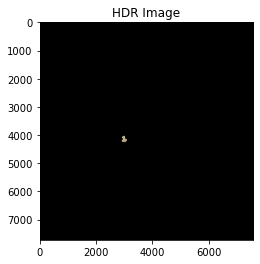

In [1]:
import spectral
from spectral import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Load the image
img = io.envi.open('ApplyMask_2022.hdr')
img


# Customize the display with additional parameters
spectral.imshow(img, cmap='gray', title='HDR Image')


In [2]:



# # Extract the bands
# band3 = img[:, :, 2]
# band4 = img[:, :, 3]
# band5 = img[:, :, 4]


nir_band = img[:, :, 5].astype(float) #5th
red_band = img[:, :, 4].astype(float) #3rd
swir_band = img[:, :,6].astype(float) #6th


# Compute NDVI, handling division by zero
denominator = nir_band + red_band
ndvi_data = np.zeros_like(denominator)
mask = denominator != 0
ndvi_data[mask] = (nir_band[mask] - red_band[mask]) / denominator[mask]
ndvi_data = np.nan_to_num(ndvi_data)

# Compute NDWI, handling division by zero
denominator = nir_band + swir_band
ndwi_data = np.zeros_like(denominator)
mask = denominator != 0
ndwi_data[mask] = (nir_band[mask] - swir_band[mask]) / denominator[mask]
ndwi_data = np.nan_to_num(ndwi_data)

# Compute NDBI, handling division by zero
denominator = swir_band + nir_band
ndbi_data = np.zeros_like(denominator)
mask = denominator != 0
ndbi_data[mask] = (swir_band[mask] - nir_band[mask]) / denominator[mask]
ndbi_data = np.nan_to_num(ndbi_data)




In [3]:
print(np.isnan(ndvi_data).sum())
print(np.isnan(ndwi_data).sum())
print(np.isnan(ndbi_data).sum())

0
0
0


In [4]:
import numpy as np
ndvi_count = np.count_nonzero(ndbi_data>0)
ndwi_count = np.count_nonzero(ndwi_data>0)
ndbi_count = np.count_nonzero(ndvi_data>0)
print('Number of non-zero values in NDVI:', ndvi_count)
print('Number of non-zero values in NDWI:', ndwi_count)
print('Number of non-zero values in NDBI:', ndbi_count)

Number of non-zero values in NDVI: 1
Number of non-zero values in NDWI: 28071
Number of non-zero values in NDBI: 417


In [5]:
import numpy as np
import pandas as pd

# Assuming ndvi_data, ndwi_data, and ndbi_data are the 2D arrays you want to save
ndvi_data_float = ndvi_data.astype(float)
ndwi_data_float = ndwi_data.astype(float)
ndbi_data_float = ndbi_data.astype(float)

In [7]:
# Create DataFrames and save to CSV
df_ndvi = pd.DataFrame({'ndvi': ndvi_data_float.ravel()})
df_ndvi = df_ndvi[df_ndvi['ndvi'] > 0]
df_ndvi.to_csv('ndvi_data.csv', index=False)


In [8]:
df_ndwi = pd.DataFrame({'ndwi': ndwi_data_float.ravel()})
df_ndwi = df_ndwi[df_ndwi['ndwi'] > 0]
df_ndwi.to_csv('ndwi_data.csv', index=False)

In [9]:
df_ndbi = pd.DataFrame({'ndbi': ndbi_data_float.ravel()})
df_ndbi = df_ndbi[df_ndbi['ndbi'] > 0]
df_ndbi.to_csv('ndbi_data.csv', index=False)

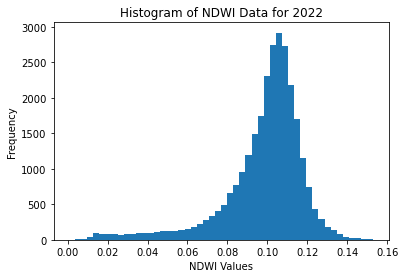

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df1 = pd.read_csv('ndwi_data.csv')

# Extract the NDWI values from the DataFrame
ndwi_values = df1['ndwi']

# Create a histogram of the NDWI values
plt.hist(ndwi_values, bins=50)

# Set the x-axis label and title
plt.xlabel('NDWI Values')
plt.ylabel('Frequency')
plt.title('Histogram of NDWI Data for 2022')

# Display the plot
plt.show()




In [24]:
df1.describe()

,ndwi
count,28071.000000
mean,0.098354
std,0.020284
min,0.000609
25%,0.091780
50%,0.102764
75%,0.110342
max,0.153069


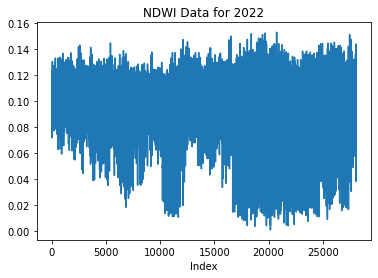

In [27]:
# Extract the NDBI values and plot them against the index values
plt.plot(df1['ndwi'])

# Set the x-axis label and title
plt.xlabel('Index')
plt.title('NDWI Data for 2022')

# Display the plot
plt.show()

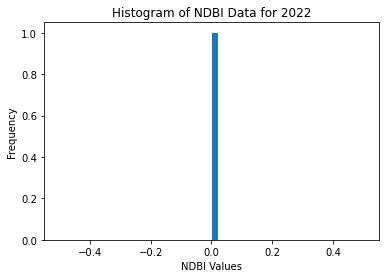

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df2 = pd.read_csv('ndbi_data.csv')

# Extract the NDBI values from the DataFrame
ndwi_values = df2['ndbi']

# Create a histogram of the NDBI values
plt.hist(ndwi_values, bins=50)

# Set the x-axis label and title
plt.xlabel('NDBI Values')
plt.ylabel('Frequency')
plt.title('Histogram of NDBI Data for 2022')

# Display the plot
plt.show()


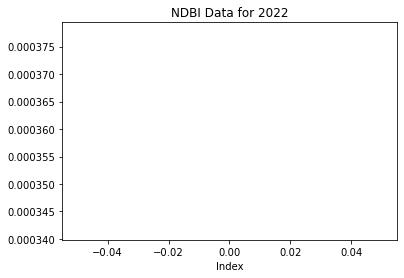

In [29]:
# Extract the NDBI values and plot them against the index values
plt.plot(df2['ndbi'])

# Set the x-axis label and title
plt.xlabel('Index')
plt.title('NDBI Data for 2022')

# Display the plot
plt.show()

In [40]:
df2.describe()

,ndbi
count,1.00000
mean,0.00036
std,NaN
min,0.00036
25%,0.00036
50%,0.00036
75%,0.00036
max,0.00036


In [38]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('ndwi_data.csv')


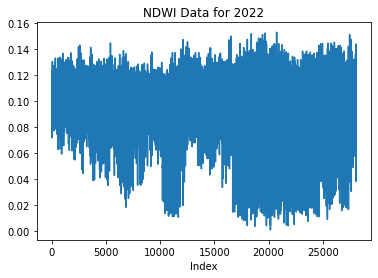

In [39]:
# Extract the NDBI values and plot them against the index values
plt.plot(df3['ndwi'])

# Set the x-axis label and title
plt.xlabel('Index')
plt.title('NDWI Data for 2022')

# Display the plot
plt.show()

In [41]:
df3.describe()

,ndwi
count,28071.000000
mean,0.098354
std,0.020284
min,0.000609
25%,0.091780
50%,0.102764
75%,0.110342
max,0.153069


In [33]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df4 = pd.read_csv('ndvi_data.csv')


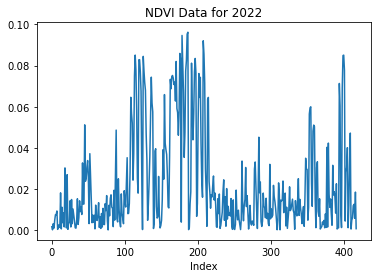

In [36]:
# Extract the NDBI values and plot them against the index values
plt.plot(df4['ndvi'])

# Set the x-axis label and title
plt.xlabel('Index')
plt.title('NDVI Data for 2022')

# Display the plot
plt.show()

In [35]:
df4.describe()

,ndvi
count,417.000000
mean,0.022487
std,0.024444
min,0.000093
25%,0.004815
50%,0.012526
75%,0.030462
max,0.096217


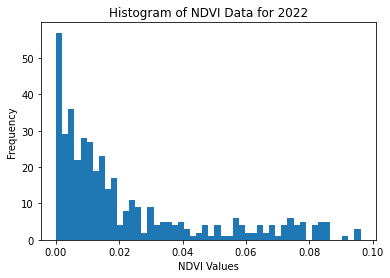

In [42]:
# Extract the NDBI values from the DataFrame
ndwi_values = df4['ndvi']

# Create a histogram of the NDBI values
plt.hist(ndwi_values, bins=50)

# Set the x-axis label and title
plt.xlabel('NDVI Values')
plt.ylabel('Frequency')
plt.title('Histogram of NDVI Data for 2022')

# Display the plot
plt.show()
